In [7]:
import csv
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.model_selection import train_test_split
from graphviz import Source # for drawing decision tree
from IPython.display import SVG # for drawing decision tree
import numpy as np
import pandas

rawData = pandas.read_csv("data/doubleStrandRaw.csv", delimiter=',', skipinitialspace=True, warn_bad_lines=True, index_col=0) 
rawData = rawData.astype('bool')
foreground = rawData.loc[rawData['class'] == True].drop('class', axis = 1)
background = rawData.loc[rawData['class'] == False].drop('class', axis = 1)
# print(rawData)

In [8]:
# print(rawData.sum(axis=0))
posCounts = foreground.sum(axis=0)
negCounts = background.sum(axis=0)
# print(posCounts[0])
# print(negCounts[0])
# print(posCounts[0]+negCounts[0])
# print("first:", posCounts[0], "pos,", negCounts[0], "neg")
# print("last:", posCounts[-1], "pos,", negCounts[-1], "neg")
# print("max pos: ", max(posCounts))
# print("max neg: ", max(negCounts))

In [44]:
n = len(foreground.columns)
posCoOccur = [0 for x in range(n*n)]
negCoOccur = [0 for x in range(n*n)]

for row in foreground.as_matrix():
    for first in range(n):
        if row[first]:
            for second in range(first+1,n):
                if row[second]:
                    posCoOccur[first*n+second] += 1                      

for row in background.as_matrix():
    for first in range(n):
        if row[first]:
            for second in range(first+1,n):
                if row[second]:
                    negCoOccur[first*n+second] += 1

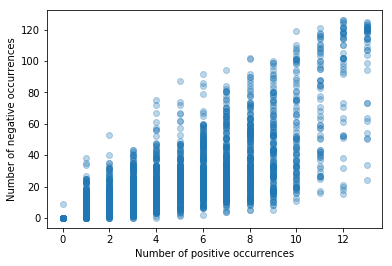

In [40]:
import random
# plt.scatter(list(map(lambda x: x + random.random() -.5, posCounts)), list(map(lambda x: x + random.random() -.5, negCounts)))
plt.scatter(posCounts, negCounts, alpha=0.3)
# plt.scatter(list(map(lambda x: x + random.random() -.5, posCounts)), list(map(lambda x: x + random.random() -.5, negCounts)), alpha=0.3)
plt.xlabel("Number of positive occurrences")
plt.ylabel("Number of negative occurrences")
plt.show()

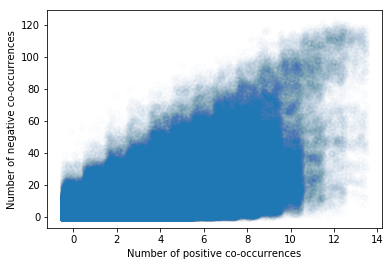

In [47]:
import random
# plt.scatter(list(map(lambda x: x + random.random() -.5, posCounts)), list(map(lambda x: x + random.random() -.5, negCounts)))
# plt.scatter(posCoOccur, negCoOccur, alpha=0.2)
plt.scatter(list(map(lambda x: x + random.random() -.5, posCoOccur)), list(map(lambda x: x + random.random() -.5, negCoOccur)), alpha=0.01)
plt.xlabel("Number of positive co-occurrences")
plt.ylabel("Number of negative co-occurrences")
plt.show()

In [58]:
import math
print(rawData.columns[math.floor(9999/len(rawData.columns))], " and ", rawData.columns[9999%len(rawData.columns)])

gimme_101_Improbizer_GTAGCTACGTTGGCTAA  and  DME_GAAGCCGAGGCAGAGC


In [50]:
never = []
neverMotifNames = []
mixed = []
mixedMotifNames = []
right = []
rightMotifNames = []
bottom = []
bottomMotifNames = []
ratio = []
ratioMotifNames = []
lasso = []
lassoMotifNames = []
welchList = []
welchListMotifNames = []
for row in range(len(posCounts)):
    if negCounts[row] == 0 and posCounts[row] == 0:
#         never.append(tData[row])
        neverMotifNames.append(rawData.columns[row])
    else:
        if posCounts[row] >= max(posCounts) - 1:
#             right.append(tData[row])
            rightMotifNames.append(rawData.columns[row])
        if negCounts[row] < 3:
#             bottom.append(tData[row])
            bottomMotifNames.append(rawData.columns[row])
        if posCounts[row] > 0 and negCounts[row] > 0:
#             mixed.append(tData[row])
            mixedMotifNames.append(rawData.columns[row])
        if (posCounts[row] / max(posCounts)) / (1+negCounts[row]/max(negCounts)) > .5:
#             ratio.append(tData[row])
            ratioMotifNames.append(rawData.columns[row])
#         if lassoScores[row] > 0:
#             lasso.append(tData[row])
#             lassoMotifNames.append(rawData.columns[row]) 
        if posCounts[row] >= 9 and negCounts[row] <= 20:
#             welchList.append(tData[row])
            welchListMotifNames.append(rawData.columns[row]) 

In [51]:


# calculate and list metrics for all motifs with foreground >= 9 & background <= 20
print('motif name|true positives|false positives|true negatives|false negatives|accuracy|Sensitivity|Specificity|True Positive + False Negative')

for motif in range(len(welchList)):
    tp = 0
    fp = 0
    tn = 0
    fn = 0
    for i in range(len(welchList[motif])):
        if(welchList[motif][i]):
            if(classes[i]):
                tp += 1
            else:
                fp += 1
        else:
            if(classes[i]):
                fn += 1
            else:
                tn += 1
    if(tn+fp == 0):
        print(welchListMotifNames[motif],"|", tp,"|", fp,"|", tn,"|", fn,"|",(tp+tn)/(tp+tn+fp+fn),"|",tp/(tp+fn),"|", "NA","|", tp+fn)
    else:
        print(welchListMotifNames[motif],"|", tp,"|", fp,"|", tn,"|", fn,"|",(tp+tn)/(tp+tn+fp+fn),"|",tp/(tp+fn),"|",tn/(tn+fp),"|", tp+fn)


motif name|true positives|false positives|true negatives|false negatives|accuracy|Sensitivity|Specificity|True Positive + False Negative
